# Meteorite Analysis

In [2]:
import pandas as pd
df = pd.read_csv('Meteorite_Landings.csv')

#Grab data from meteorites fallen to Earth
fallen = df[df['fall'] == 'Fell']

#Grab data from meteorites found on Earth
found = df[df['fall'] == 'Found']
fallen

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
1106,Zhuanghe,30408,Valid,H5,2900.0,Fell,1976.0,39.66667,122.98333,"(39.66667, 122.98333)"
1107,Zmenj,30411,Valid,Howardite,246.0,Fell,1858.0,51.83333,26.83333,"(51.83333, 26.83333)"
1108,Zomba,30412,Valid,L6,7500.0,Fell,1899.0,-15.18333,35.28333,"(-15.18333, 35.28333)"
1109,Zsadany,30413,Valid,H5,552.0,Fell,1875.0,46.93333,21.50000,"(46.93333, 21.5)"


In [3]:
found

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
37,Northwest Africa 5815,50693,Valid,L5,256.8,Found,NaN,0.00000,0.00000,"(0.0, 0.0)"
520,Cumulus Hills 04075,32531,Valid,Pallasite,9.6,Found,2003.0,NaN,NaN,NaN
757,Dominion Range 03239,32591,Valid,L6,69.5,Found,2002.0,NaN,NaN,NaN
804,Dominion Range 03240,32592,Valid,LL5,290.9,Found,2002.0,NaN,NaN,NaN
1111,Abajo,4,Valid,H5,331.0,Found,1982.0,26.80000,-105.41667,"(26.8, -105.41667)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [26]:
clean_fallen = fallen.dropna(how='any', axis=0)
clean_found = found.dropna(how='any', axis=0)
clean_fallen = clean_fallen.drop(columns='GeoLocation')
clean_found = clean_found.drop(columns='GeoLocation')
clean_fallen = clean_fallen[(clean_fallen['reclat'] != 0.0) & (clean_fallen['reclong'] != 0.0)]
clean_found = clean_found[(clean_found['reclat'] != 0.0) & (clean_found['reclong'] != 0.0)]

clean_fallen

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000
...,...,...,...,...,...,...,...,...,...
1106,Zhuanghe,30408,Valid,H5,2900.0,Fell,1976.0,39.66667,122.98333
1107,Zmenj,30411,Valid,Howardite,246.0,Fell,1858.0,51.83333,26.83333
1108,Zomba,30412,Valid,L6,7500.0,Fell,1899.0,-15.18333,35.28333
1109,Zsadany,30413,Valid,H5,552.0,Fell,1875.0,46.93333,21.50000


In [25]:
clean_found

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
1111,Abajo,4,Valid,H5,331.00,Found,1982.0,26.80000,-105.41667
1112,Abar al' Uj 001,51399,Valid,H3.8,194.34,Found,2008.0,22.72192,48.95937
1113,Abbott,5,Valid,H3-6,21100.00,Found,1951.0,36.30000,-104.28333
1114,Abernathy,7,Valid,L6,2914.00,Found,1941.0,33.85000,-101.80000
1115,Abo,8,Valid,H,1.20,Found,1840.0,60.43333,22.30000
...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.00,Found,1990.0,29.03700,17.01850
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.00,Found,1999.0,13.78333,8.96667
45713,Zlin,30410,Valid,H4,3.30,Found,1939.0,49.25000,17.66667
45714,Zubkovsky,31357,Valid,L6,2167.00,Found,2003.0,49.78917,41.50460


In [27]:
fallen_desc = clean_fallen.describe()
fallen_desc

,id,mass (g),year,reclat,reclong
count,1063.000000,1.063000e+03,1063.000000,1063.000000,1063.000000
mean,16484.643462,4.758984e+04,1913.874882,30.171940,20.310107
std,10527.360498,7.210902e+05,74.778218,22.992631,69.458340
min,1.000000,1.000000e-01,860.000000,-44.116670,-157.866670
25%,10079.500000,7.000000e+02,1875.500000,22.016665,-4.525000
50%,15422.000000,2.900000e+03,1924.000000,36.100000,20.233330
75%,23109.000000,1.050000e+04,1964.000000,46.058335,76.465835
max,57168.000000,2.300000e+07,2013.000000,66.348330,174.400000


In [28]:
found_desc = clean_found.describe()
found_desc

,id,mass (g),year,reclat,reclong
count,30642.000000,3.064200e+04,30642.000000,30642.000000,30642.000000
mean,20899.679884,1.767045e+04,1989.626885,-50.300061,75.296171
std,15083.468192,6.881301e+05,18.880188,44.971897,83.256050
min,4.000000,0.000000e+00,1575.000000,-87.366670,-165.433330
25%,9174.250000,6.200000e+00,1984.000000,-79.683330,35.666670
50%,18678.500000,2.718500e+01,1992.000000,-72.774722,57.311555
75%,27949.750000,1.679925e+02,2000.000000,-24.850000,159.666670
max,57455.000000,6.000000e+07,2012.000000,81.166670,178.200000


In [29]:
fallen_invalids = clean_fallen[(clean_fallen == 'Relict').any(axis=1)]
fallen_invalids #No invalids

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong


In [30]:
found_invalids = clean_found[(clean_found == 'Relict').any(axis=1)]
found_invalids #A relict meteorite that cannot be assigned easily to a class

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
6818,David Glacier 92308,6614,Relict,Chondrite-fusion crust,1.700,Found,1992.0,-75.31667,162.00000
12640,Gove,52859,Relict,Relict iron,0.000,Found,1979.0,-12.26333,136.83833
20679,Lewis Cliff 87241,13702,Relict,Chondrite-fusion crust,0.500,Found,1987.0,-84.34563,161.31058
23094,Meteorite Hills 001139,45809,Relict,Fusion crust,0.013,Found,2000.0,-79.68333,159.75000
31061,Österplana 048,56147,Relict,Relict OC,0.000,Found,2004.0,58.58333,13.43333
31062,Österplana 049,56148,Relict,Relict OC,0.000,Found,2012.0,58.58333,13.43333
31063,Österplana 050,56149,Relict,Relict OC,0.000,Found,2003.0,58.58333,13.43333
31064,Österplana 051,56150,Relict,Relict OC,0.000,Found,2006.0,58.58333,13.43333
31065,Österplana 052,56151,Relict,Relict OC,0.000,Found,2006.0,58.58333,13.43333
31066,Österplana 053,56152,Relict,Relict OC,0.000,Found,2002.0,58.58333,13.43333


In [32]:
clean_fallen = clean_fallen[(clean_fallen.nametype != 'Relict')]
clean_fallen['year'] = clean_fallen['year'].astype(int)
clean_fallen = clean_fallen[(clean_fallen.year <= 2022)]
clean_fallen

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000
...,...,...,...,...,...,...,...,...,...
1106,Zhuanghe,30408,Valid,H5,2900.0,Fell,1976,39.66667,122.98333
1107,Zmenj,30411,Valid,Howardite,246.0,Fell,1858,51.83333,26.83333
1108,Zomba,30412,Valid,L6,7500.0,Fell,1899,-15.18333,35.28333
1109,Zsadany,30413,Valid,H5,552.0,Fell,1875,46.93333,21.50000


In [33]:
clean_found = clean_found[(clean_found.nametype != 'Relict')]
clean_found['year'] = clean_found['year'].astype(int)
clean_found = clean_found[(clean_found.year <= 2022)]
clean_found

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
1111,Abajo,4,Valid,H5,331.00,Found,1982,26.80000,-105.41667
1112,Abar al' Uj 001,51399,Valid,H3.8,194.34,Found,2008,22.72192,48.95937
1113,Abbott,5,Valid,H3-6,21100.00,Found,1951,36.30000,-104.28333
1114,Abernathy,7,Valid,L6,2914.00,Found,1941,33.85000,-101.80000
1115,Abo,8,Valid,H,1.20,Found,1840,60.43333,22.30000
...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.00,Found,1990,29.03700,17.01850
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.00,Found,1999,13.78333,8.96667
45713,Zlin,30410,Valid,H4,3.30,Found,1939,49.25000,17.66667
45714,Zubkovsky,31357,Valid,L6,2167.00,Found,2003,49.78917,41.50460


In [34]:
maximum_from_fallen = clean_fallen[(clean_fallen == clean_fallen['mass (g)'].max()).any(axis=1)]
maximum_from_fallen

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
920,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000000.0,Fell,1947,46.16,134.65333


In [35]:
minimum_from_fallen = clean_fallen[(clean_fallen == clean_fallen['mass (g)'].min()).any(axis=1)]
minimum_from_fallen

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
1055,Vilna,24183,Valid,L5,0.1,Fell,1967,54.22500,-111.69167
1090,Yoshiki,30372,Valid,Stone-uncl,0.1,Fell,1928,34.16667,131.45000


In [36]:
maximum_from_found = clean_found[clean_found['mass (g)'] == clean_found['mass (g)'].max()]
maximum_from_found

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920,-19.58333,17.91667


In [37]:
minimum_from_found = clean_found[clean_found['mass (g)'] == clean_found['mass (g)'].min()]
minimum_from_found

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong
42703,Yamato 8333,29438,Valid,H5,0.01,Found,1983,-71.5,35.66667


In [21]:
print(df['recclass'].unique())
print(f"Unique meteorite classes: {df['recclass'].nunique()}")

['L5' 'H6' 'EH4' 'Acapulcoite' 'L6' 'LL3-6' 'H5' 'L' 'Diogenite-pm'
 'Unknown' 'H4' 'H' 'Iron, IVA' 'CR2-an' 'LL5' 'CI1' 'L/LL4'
 'Eucrite-mmict' 'CV3' 'Ureilite-an' 'Stone-uncl' 'L3' 'Angrite' 'LL6'
 'L4' 'Aubrite' 'Iron, IIAB' 'Iron, IAB-sLL' 'Iron, ungrouped' 'CM2' 'OC'
 'Mesosiderite-A1' 'LL4' 'C2-ung' 'LL3.8' 'Howardite' 'Eucrite-pmict'
 'Diogenite' 'LL3.15' 'LL3.9' 'Iron, IAB-MG' 'H/L3.9' 'Iron?' 'Eucrite'
 'H4-an' 'L/LL6' 'Iron, IIIAB' 'H/L4' 'H4-5' 'L3.7' 'LL3.4'
 'Martian (chassignite)' 'EL6' 'H3.8' 'H3-5' 'H5-6' 'Mesosiderite' 'H5-7'
 'L3-6' 'H4-6' 'Ureilite' 'Iron, IID' 'Mesosiderite-A3/4' 'CO3.3' 'H3'
 'EH3/4-an' 'Iron, IIE' 'L/LL5' 'H3.7' 'CBa' 'H4/5' 'H3/4' 'H?' 'H3-6'
 'L3.4' 'Iron, IAB-sHL' 'L3.7-6' 'EH7-an' 'Iron' 'CR2' 'CO3.2' 'K3' 'L5/6'
 'CK4' 'Iron, IIE-an' 'L3.6' 'LL3.2' 'Pallasite' 'CO3.5' 'Lodranite'
 'Mesosiderite-A3' 'L3-4' 'H5/6' 'Pallasite, PMG' 'Eucrite-cm' 'L5-6'
 'CO3.6' 'Martian (nakhlite)' 'LL3.6' 'C3-ung' 'H3-4' 'CO3.4' 'EH3'
 'Iron, IAB-ung' 'Winonait

In [ ]:
#TODO Function to calculate a price for each meteorites, fallen and found
# Martian and Lunar are worth $1k/gram
# Stone and Chondrites are worth $20/gram
# Pallasites and Mesosiderites are worth $12/grams
# Iron is worth $5/gram
def price_tagger(meteorite_class, class_list):
    #LIST OF CHONDRITES
    #LIST OF 
    pass

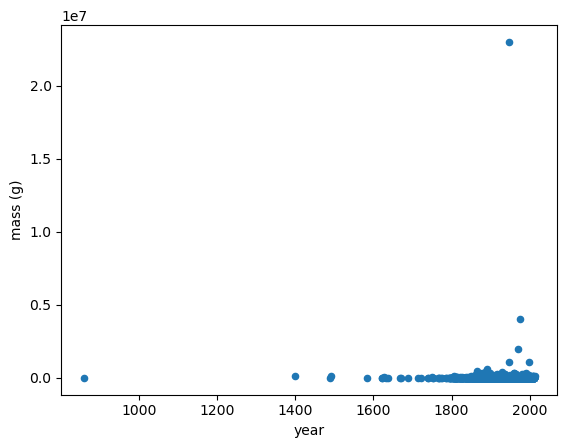

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

#TODO Do a better way to plot data using more of pyplot
clean_fallen.plot(x='year', y='mass (g)', kind='scatter')
plt.show()

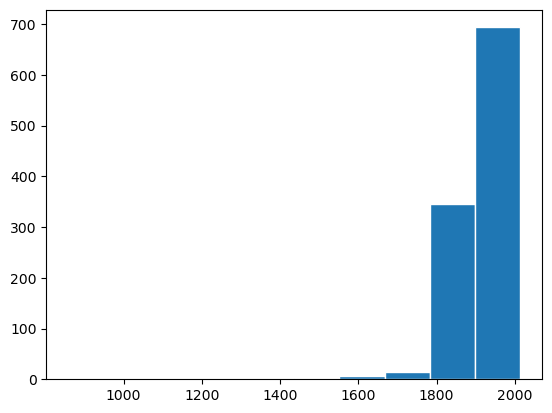

In [18]:
plt.hist(clean_fallen['year'], edgecolor='white', bins=10)
plt.show()

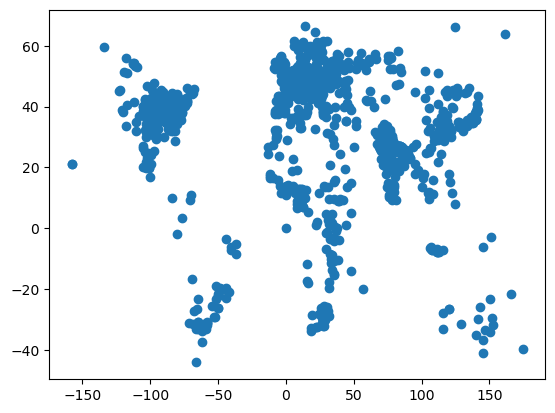

In [19]:
#TODO: Use an actual map to pinpoint coordinates for fallen and found meteorites
plt.scatter(x=clean_fallen['reclong'], y=clean_fallen['reclat'])
plt.rcParams["figure.figsize"] = (500,350)
plt.show()